# Proyek Analisis Data: Bike Sharing
- **Nama:** Salsa Rizki Saputri
- **Email:** salsarizkisaputrii@gmail.com
- **ID Dicoding:** salsa_rizki_saputrii

## Menentukan Pertanyaan Bisnis

- Apa pengaruh keadaan cuaca dengan total rental sepeda?
- Pada jam berapa terjadi peak rental sepeda di setiap harinya?

## Import Semua Packages/Library yang Digunakan

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# ambil data day.csv
day_df = pd.read_csv("data/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
# ambil data hour.csv
hour_df = pd.read_csv("data/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

In [7]:
# melihat summary dari day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# melihat summary dari hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# cek missing value pada day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# cek missing value pada hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# cek data duplikat pada day_df
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())

Jumlah duplikasi day_df:  0


In [13]:
# cek data duplikat pada hour_df
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi hour_df:  0


In [14]:
# cek statistic summary pada day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
# cek statistic summary pada hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tipe data dteday pada day_df dan hour_df memiliki tipe data Object, seharusnya datetime
- Tidak ada duplikasi atau missing value pada day_df dan hour_df

### Cleaning Data

In [16]:
# mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom dteday pada day_df dan hour_df sudah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore day_df

In [19]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dalam satu hari, rata-rata terdapat 4504 sepeda yang dirental, dengan peak tertinggi mencapai 8714 sepeda dirental.

In [23]:
day_df.groupby(by=["weathersit"]).agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449

Terlihat bahwa cuaca dengan kategori 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) merupakan cuaca yang paling kurang digemari untuk merental sepeda

### Explore hour_df

In [24]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Terlihat terdapat orang yang merental sepeda di tiap jam dalam satu hari dengan rata-rata rental pada jam 11

In [28]:
hour_df.groupby(by=["hr"]).agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

Terdapat minimal 1 orang yang merental sepeda di tiap jam dalam sehari dengan rata-rata rental sepeda terbanyak adalah pada jam 17 sebanyak 461 sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa pengaruh keadaan cuaca dengan total rental sepeda?

In [41]:
sum_weather_count = day_df.groupby(["weathersit"]).resample(rule='ME', on='dteday').agg({
    'cnt': 'sum'
}).reset_index()

sum_weather_count.head(100)

,weathersit,dteday,cnt
0,1,2011-01-31,21004
1,1,2011-02-28,35190
2,1,2011-03-31,39703
3,1,2011-04-30,52392
4,1,2011-05-31,87599
...,...,...,...
67,3,2012-08-31,0
68,3,2012-09-30,0
69,3,2012-10-31,4661
70,3,2012-11-30,0


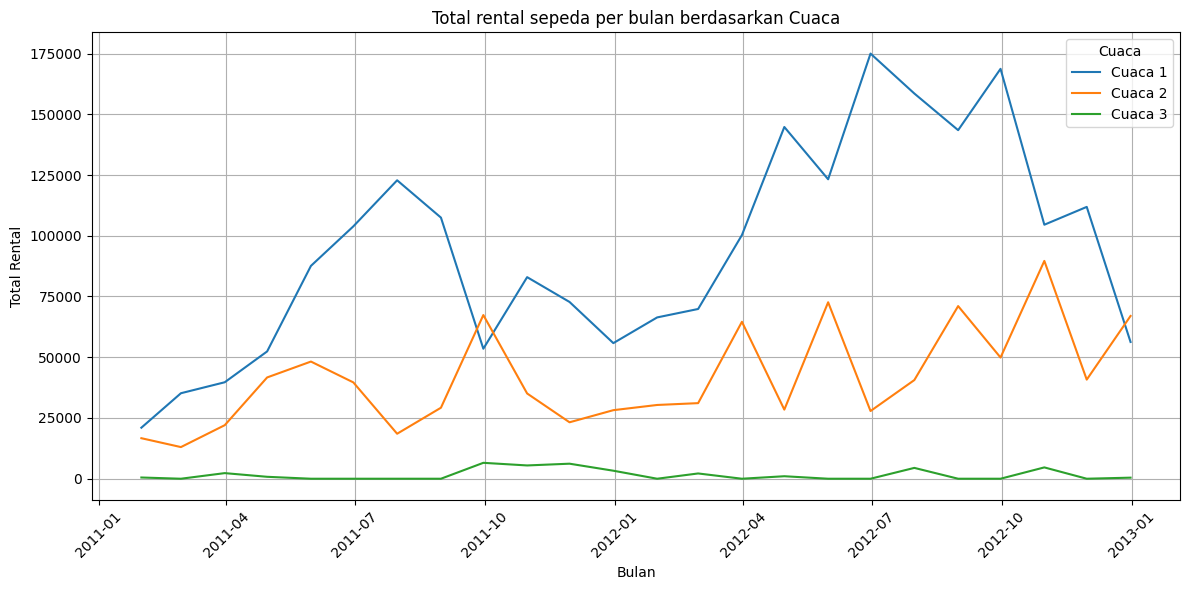

In [46]:

pivot_data = sum_weather_count.pivot(index='dteday', columns='weathersit', values='cnt')
# Plotting
plt.figure(figsize=(12, 6))
for col in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[col], label=f'Cuaca {col}')

plt.title('Total rental sepeda per bulan berdasarkan Cuaca')
plt.xlabel('Bulan')
plt.ylabel('Total Rental')
plt.legend(title='Cuaca')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, cuaca sangat memengaruhi total rental sepeda, dimana Cuaca 1 (Cerah, Sedikit berawan) merupakan cuaca yang digemari pengguna dibuktikan dengan total rental yang tinggi. Sebaliknya Cuaca 3 (Hujan, Bersalju) kurang digemari pengguna dibuktikan dengan total rental yang rendah.

### Pertanyaan 2: Pada jam berapa terjadi peak rental sepeda di setiap harinya?

In [52]:
peak_per_hour = hour_df.groupby(["hr"]).resample(rule='ME', on='dteday').agg({
    'cnt': 'sum'
}).reset_index()

peak_per_hour.head(100)

,hr,dteday,cnt
0,0,2011-01-31,438
1,0,2011-02-28,549
2,0,2011-03-31,581
3,0,2011-04-30,997
4,0,2011-05-31,1863
...,...,...,...
95,3,2012-12-31,301
96,4,2011-01-31,44
97,4,2011-02-28,41
98,4,2011-03-31,63


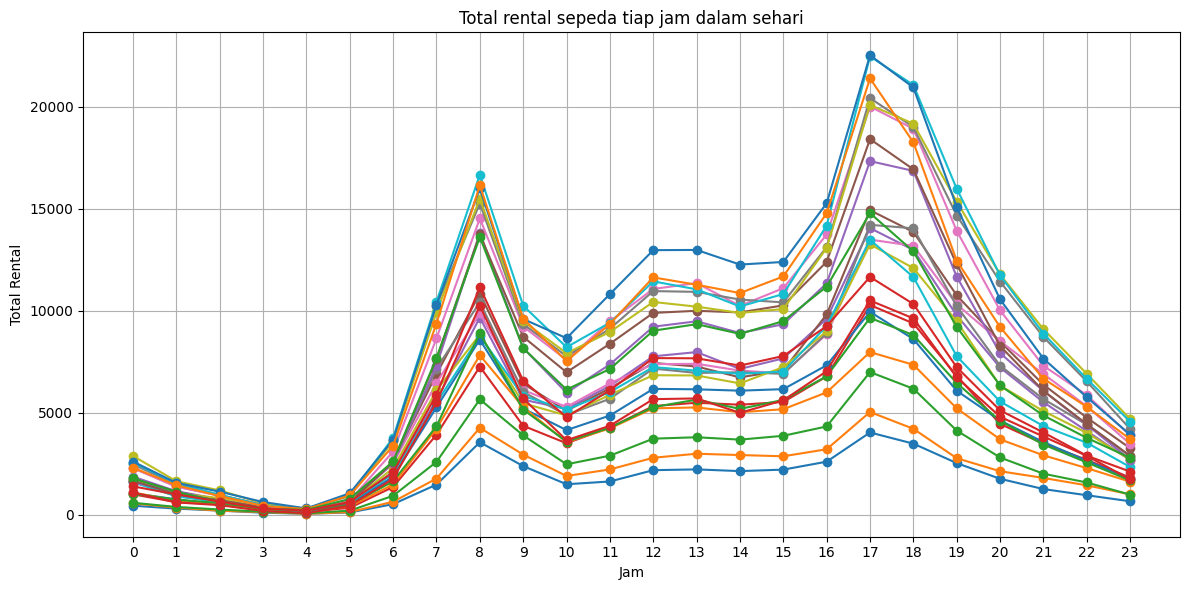

In [55]:
plt.figure(figsize=(12, 6))

for date in peak_per_hour['dteday'].unique():
    daily_data = peak_per_hour[peak_per_hour['dteday'] == date]
    plt.plot(daily_data['hr'], daily_data['cnt'], marker='o', label=date)

plt.title('Total rental sepeda tiap jam dalam sehari')
plt.xlabel('Jam')
plt.ylabel('Total Rental')
plt.xticks(range(0, 24))  # Set x-ticks for each hour
plt.grid()
# plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, total rental sepeda rata-rata mengalami peak pada jam 17 di tiap harinya dengan peak kedua pada jam 8.

## Conclusion

- Apa pengaruh keadaan cuaca dengan total rental sepeda?
Berdasarkan data di atas, cuaca sangat memengaruhi total rental sepeda, dimana Cuaca 1 (Cerah, Sedikit berawan) merupakan cuaca yang digemari pengguna dibuktikan dengan total rental yang tinggi. Sebaliknya Cuaca 3 (Hujan, Bersalju) kurang digemari pengguna dibuktikan dengan total rental yang rendah.

- Pada jam berapa terjadi peak rental sepeda di setiap harinya?
Berdasarkan grafik diatas, total rental sepeda rata-rata mengalami peak pada jam 17 di tiap harinya dengan peak kedua pada jam 8.

In [56]:
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)